In [16]:
import requests
import matplotlib.pyplot as plt
ip = "18.191.164.252"

# Histórico de eficiência da bateria


Digite um valor para lastN (entre 1 e 100): 30


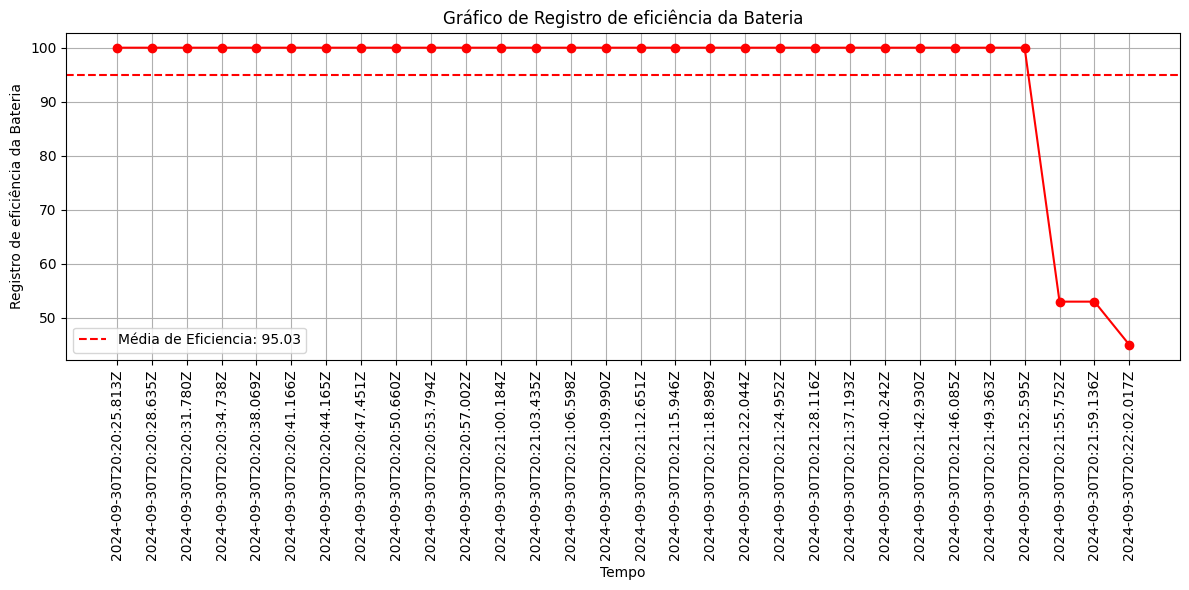

In [65]:
# Função para obter os dados de luminosidade a partir da API
def obter_dados(lastN,context):
    url = f"http://{ip}:8666/STH/v1/contextEntities/type/Lamp/id/urn:ngsi-ld:Lamp:bit/attributes/{context}?lastN={lastN}"
    headers = {
        'fiware-service': 'smart',
        'fiware-servicepath': '/'
    }
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        data = response.json()
        values = data['contextResponses'][0]['contextElement']['attributes'][0]['values']
        return values
    else:
        print(f"Erro ao obter dados: {response.status_code}")
        return []

# Função para criar e exibir o gráfico
def plotar_grafico(search, title):
    plt.figure(figsize=(12, 6))
    for key, attData in search.items():
        DATA = [entry['attrValue'] for entry in attData["DATA"]]
        TIME = [entry['recvTime'] for entry in attData["DATA"]]

        if len(DATA) == 0:  # Verifica se os dados estão vazios
            print(f"Nenhum dado disponível para {key}.")
            return

        media = sum(DATA) / len(DATA)
        plt.plot(TIME, DATA, marker='o', linestyle='-', color=attData["COLOR"])
        plt.axhline(media, color=attData["COLOR"], linestyle='--', label=f'Média de {key}: {media:.2f}')

    plt.title(f'Gráfico de {title}')
    plt.xlabel('Tempo')
    plt.ylabel(title)

    plt.xticks(rotation=90)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

while True:
    try:
        lastN = int(input("Digite um valor para lastN (entre 1 e 100): "))
        if 1 <= lastN <= 100:
            break
        else:
            print("O valor deve estar entre 1 e 100. Tente novamente.")
    except ValueError:
        print("Por favor, digite um número válido.")

plotar_grafico({
    "Eficiencia": {"DATA":obter_dados(lastN,"efficiency"),"COLOR":"r"}
},"Registro de eficiência da Bateria")

# Status do sendor de AttackMode

In [66]:
url = f"http://{ip}:1026/v2/entities/urn:ngsi-ld:Lamp:bit/attrs/attackmode"
headers = {
    'fiware-service': 'smart',
    'fiware-servicepath': '/'
}
response = requests.get(url, headers=headers)
if response.status_code == 200:
    data = response.json()
    value = data['value']
    print(value)
else:
    print(f"Erro ao obter dados: {response.status_code}")


0:13
